In [176]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

In [177]:
# import the CSV data file into a dataframe
dfX = pd.read_csv("bostonWeights.csv")
dfY = pd.read_csv("bostonTarget.csv")

dfX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [178]:
# gather stats about about final prices
# MEDV represents price in thousands
dfY.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [179]:
# gather stats about about the weights/features
dfX.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [180]:
# split the data frames into two sub frames
# these are the  train and test sets
# it returns a tuple of 4 sets (xTrain, xTest, yTrain, yTest)
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
    dfX, dfY, test_size=0.30, random_state=42 )


In [188]:
# assign and train linear regression model
from sklearn.linear_model import LinearRegression
lin = skl.linear_model.LinearRegression().fit(xTrain, yTrain)

In [189]:
# predict y values for test set
yTestPredictions = lin.predict(xTest)

In [190]:
# compare predictions with actual yTest set
print(skl.metrics.mean_squared_error(yTest, yTestPredictions))

21.51744423117743


In [185]:
# make example of a custom input that the user will provide
usersHouse = [[.28, 0.00, 11.69, 0.00, .624, 6.623, 94.05, 0.07, 5, 370, 19, 391, 3]]
lin.predict(usersHouse)

array([[31.96944762]])

In [186]:
# persist the model for future use without having to retrain
import joblib
# joblib.dump(lin, 'HousePricePrediction_V2.joblib')


['HousePricePrediction.joblib']

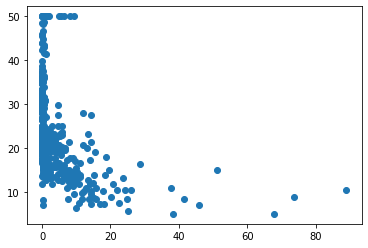

In [205]:
# create visualization for the data based on Crime
fig, ax = plt.subplots()
ax.scatter(dfX["CRIM"], dfY);